## EDA

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [179]:
df=pd.read_csv('ToyotaCorolla.csv')

In [180]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [182]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


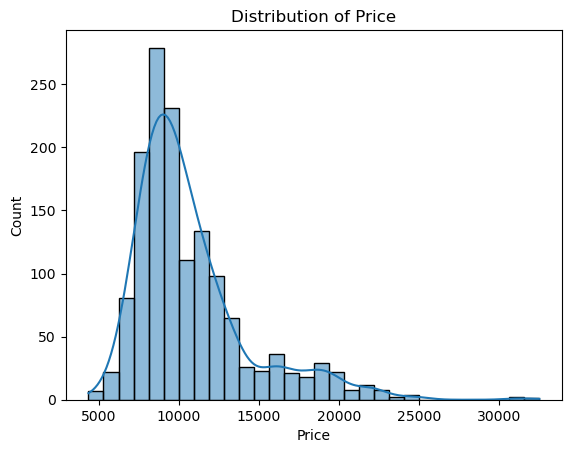

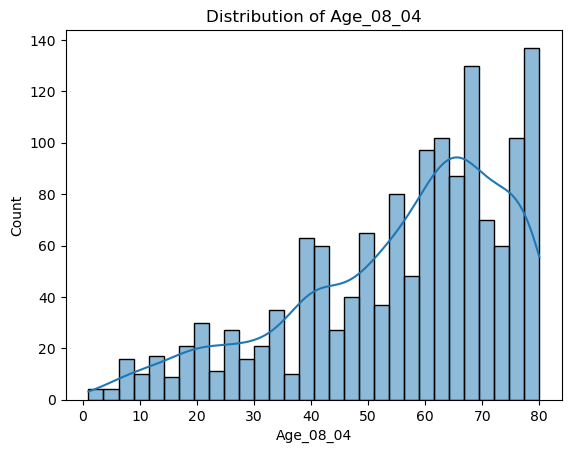

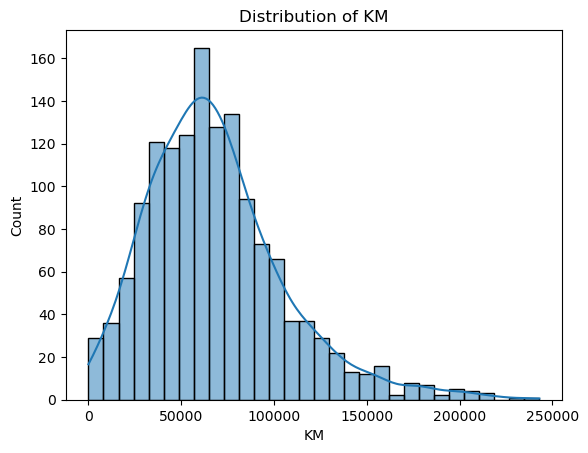

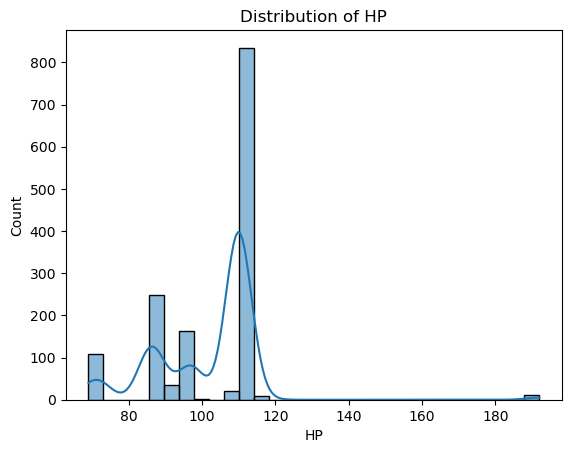

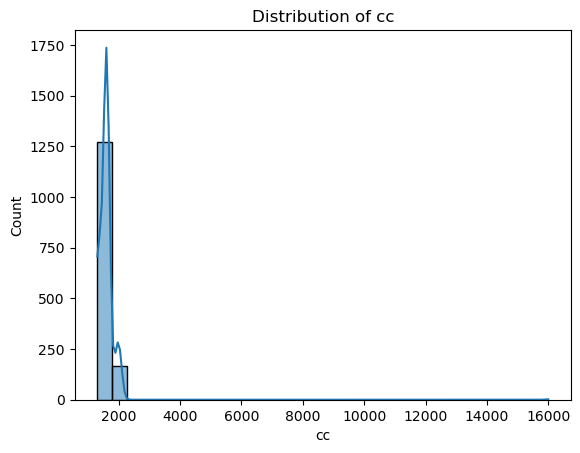

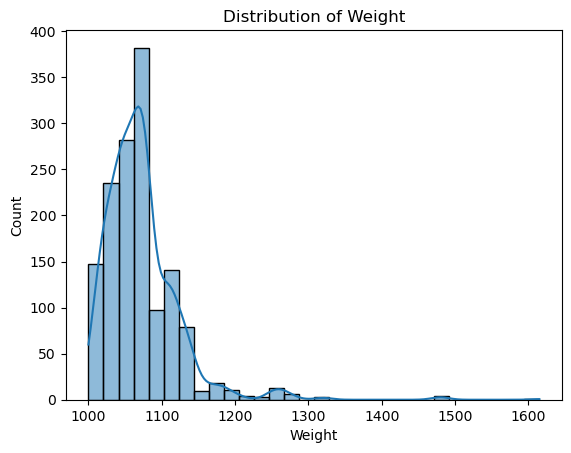

In [183]:
## Visualizations
# Distribution of Numerical Variables
numerical_cols=['Price','Age_08_04','KM','HP','cc','Weight']
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

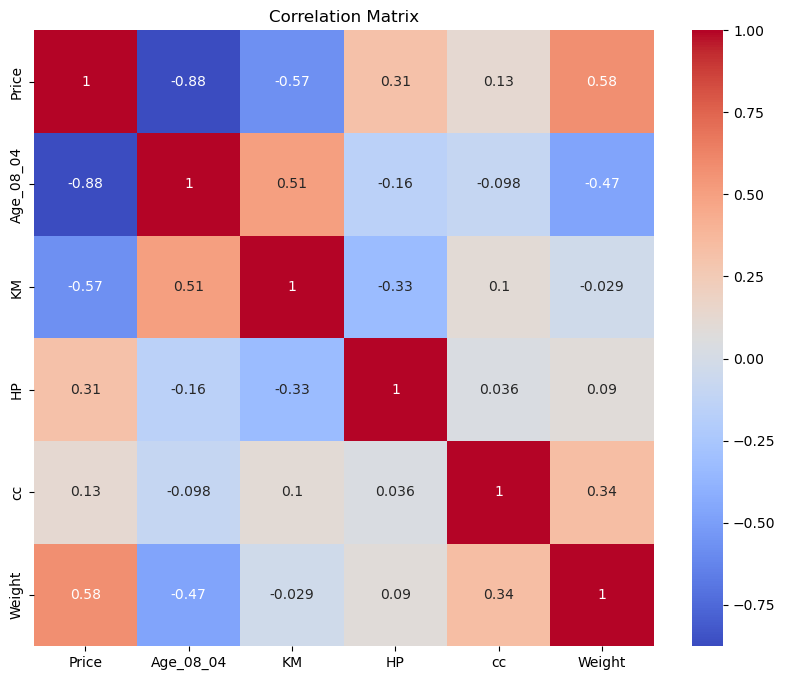

In [184]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [185]:
# Handle categorical variables
df=pd.get_dummies(df,columns=['Fuel_Type'],drop_first=True)

In [186]:
#Standardize Numerical Variables
scaler=StandardScaler()
scaled_cols=['Age_08_04','KM','HP','cc','Weight']
df[scaled_cols]=scaler.fit_transform(df[scaled_cols])
df[scaled_cols]


,Age_08_04,KM,HP,cc,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,1.853577
...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.091915


## Split the dataset

In [188]:
X=df.drop(columns=['Price'])
y=df['Price']
# Split into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [189]:
X_train.shape

(1148, 11)

In [190]:
X_test.shape

(288, 11)

## Build Multiple Linear Regression Models

In [192]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [193]:
# Coefficients
coefficients=pd.DataFrame({'Features':X.columns,'Coefficient':linear_model.coef_})
coefficients

,Features,Coefficient
0,Age_08_04,-2.246662e+03
1,KM,-6.085706e+02
2,HP,2.102533e+02
3,Automatic,1.488309e+02
4,cc,-1.288507e+01
5,Doors,-6.031097e+01
6,Cylinders,1.421085e-12
7,Gears,5.516007e+02
8,Weight,1.362139e+03
9,Fuel_Type_Diesel,-6.854876e+01


In [194]:
#Predictions
y_pred=linear_model.predict(X_test)

In [195]:
y_pred

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [196]:
# Model Evaluation
mean_squared_error(y_test,y_pred)

2203043.823143705

In [197]:
r2_score(y_test,y_pred)

0.834888804061108

## Ridge and Lasso Regression

In [199]:
## Ridge Regression
ridge=Ridge(alpha=1)
ridge.fit(X_train,y_train)


Ridge(alpha=1)

In [200]:
y_pred=ridge.predict(X_test)

In [201]:
mean_squared_error(y_test,y_pred)

2197825.3736894936

In [202]:
r2_score(y_test,y_pred)

0.8352799104119122

In [203]:
## Lasso Regression
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [204]:
y_pred=lasso.predict(X_test)

In [205]:
mean_squared_error(y_test,y_pred)

2195153.9471017616

In [206]:
r2_score(y_test,y_pred)

0.8354801254208601

In [207]:
## What is Normalization & Standardization and how is it helpful?
#Both normalization and standardization are techniques used in data preprocessing to transform numerical features. 
#They help ensure that machine learning models perform optimally, especially those sensitive to the scale of data (e.g., gradient descent-based models, Ridge, Lasso, SVMs, KNN, etc.)
# It is hlepful as it improves model performance,speed up training and it also handles distance based models.

In [208]:
## What techniques can be used to address multicollinearity in multiple linear regression?
#1.Remove Highly Correlated Prectors
#2.Combine Correlated Variables
#3.Principal Component Analysis(PCA)
#4.Use Regularization Tecniques(Ridge Regression,Lasso Regression)
#5.Center or Standardize Variables